<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Text_Mining_Elon_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Text Mining assignment

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [ ]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
book=pd.read_csv("Elon_musk.csv",encoding="unicode_escape")
book

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
book=book.rename({"Unnamed: 0":"Years"},axis=1)
book

,Years,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
book=book.rename({"Text":"x"},axis=1)
book

,Years,x
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
#Preprocessing Cleaning data
book = [x.strip() for x in book.x]
book = [x for x in book if x]
book[0:20]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
# Joining the list into one string/text
text = ' '.join(book)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
#Punctuation removal
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [ ]:
#Tokenization - break into smaller words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#total # of words
len(text_tokens)

21078

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(no_stop_tokens)

15751

In [ ]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [ ]:
#Spacy Library
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Language Model
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [ ]:
#Lemmatization
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [ ]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<15795x4971 sparse matrix of type '<class 'numpy.int64'>'
	with 15456 stored elements in Compressed Sparse Row format>

In [ ]:
#Repetitive words
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2439, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1676, 'nextlevel': 3157, 'have': 1670, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1608, 'interview': 2550, 'gtera27': 1627, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1657, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1722, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1642, 'thanks': 4381, 'indeed': 2488, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [ ]:
#features extraction matrix
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(15795, 4971)


In [ ]:
# ngram range
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# TF-IDF Vectorizer with parameters
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

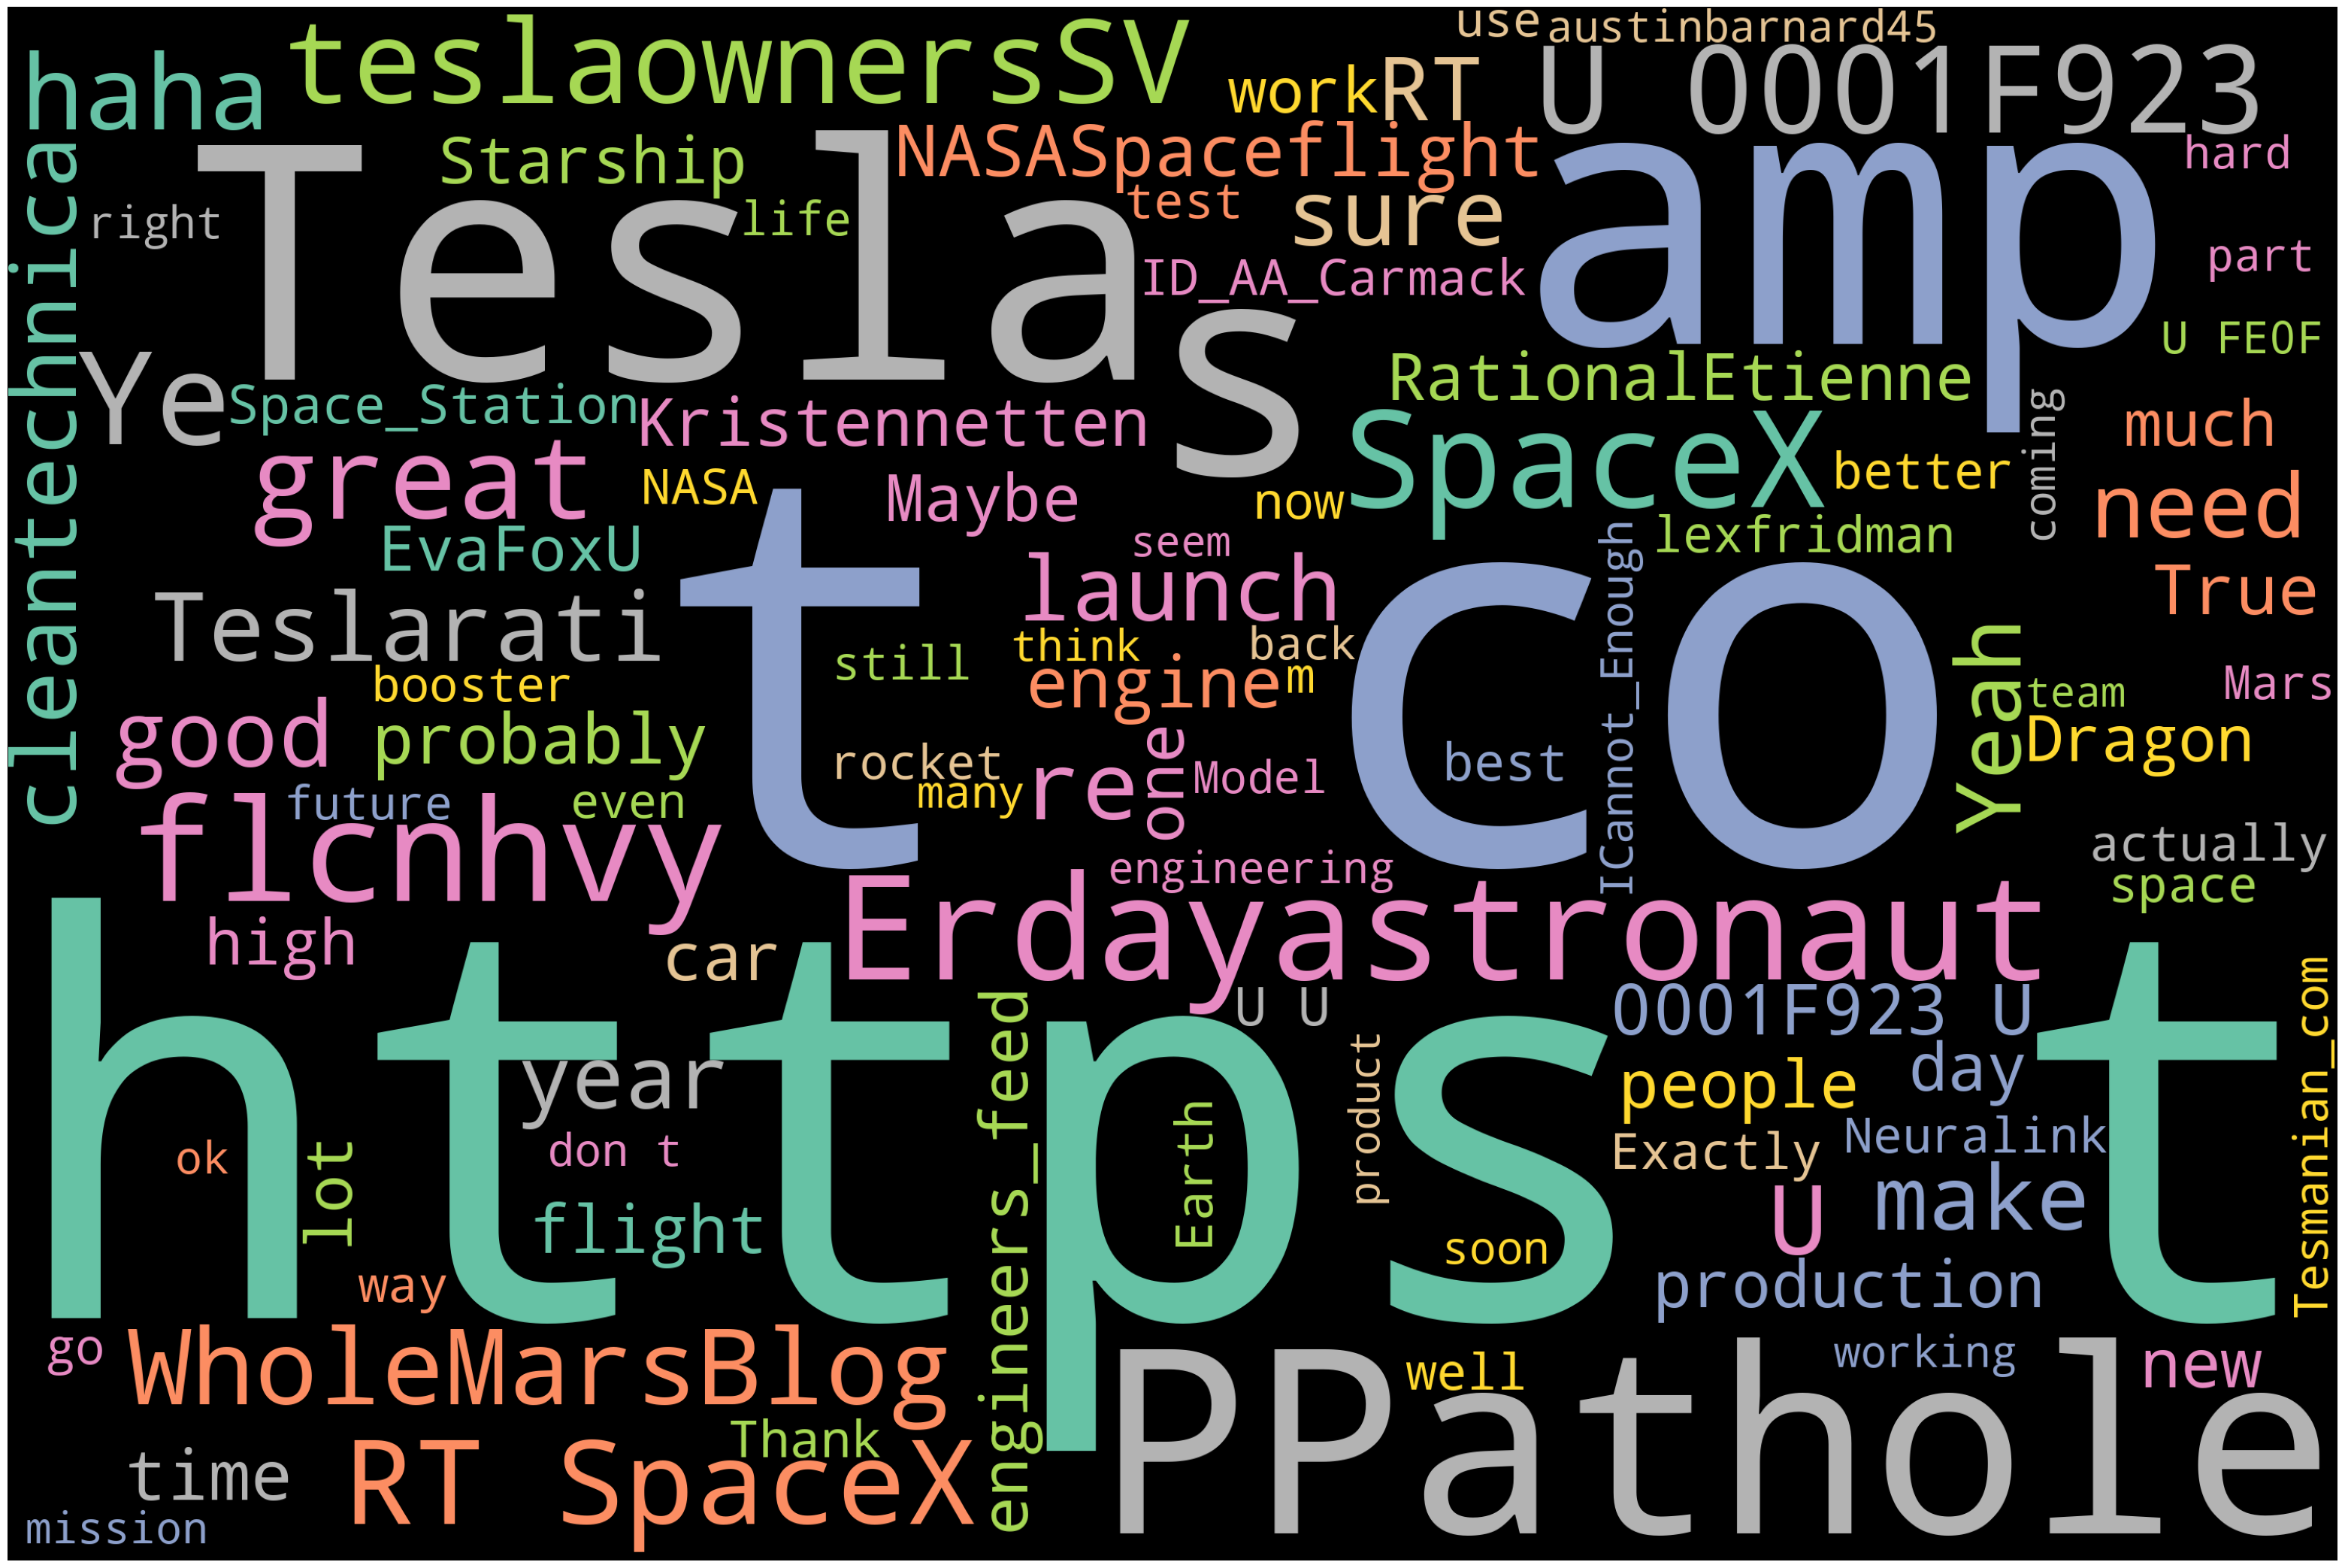

In [ ]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)

plot_cloud(wordcloud)

###Named Entity Recognition

In [ ]:
#Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [ ]:
#RT@SpaceX has been misclassified as person
one_block = book[22]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
#Identify POS
for token in doc_block[0:100]:
    print(token, token.pos_)

RT PROPN
@SpaceX PROPN
: PUNCT
NASA PROPN
has AUX
selected VERB
Falcon PROPN
Heavy PROPN
to PART
launch VERB
the DET
first ADJ
two NUM
elements NOUN
of ADP
the DET
lunar ADJ
Gateway NOUN
together ADV
on ADP
one NUM
mission NOUN
! PUNCT
https://t.co/3pWt PROPN


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:])

['selected', 'launch', 'elements', 'Gateway', 'mission']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,selected,1
1,launch,1
2,elements,1
3,gateway,1
4,mission,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

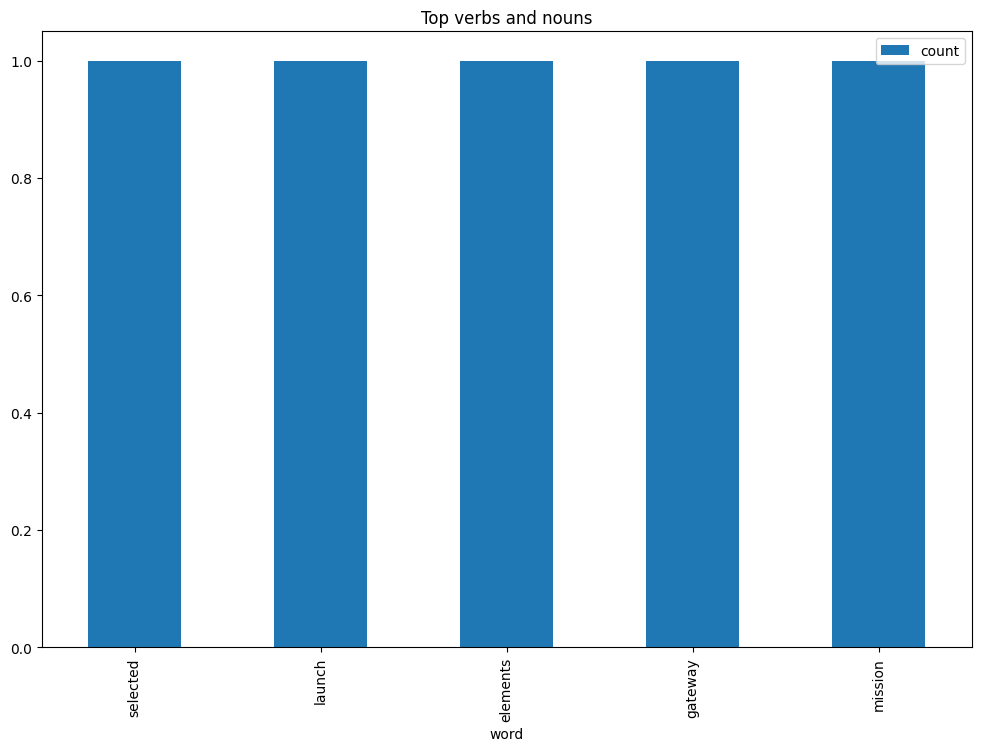

In [ ]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

Sentiment Analysis

In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("/content/Elon_musk.csv",encoding="unicode_escape",error_bad_lines=False,)

<ipython-input-230-2ce5b32c2d9e>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("/content/Elon_musk.csv",encoding="unicode_escape",error_bad_lines=False,)


In [ ]:
book=book.rename({"Unnamed: 0":"Years"},axis=1)
book

,Years,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
book=book.rename({"Text":"x"},axis=1)
book

,Years,x
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
book = [x.strip() for x in book.x]
book = [x for x in book if x]

In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
calculate_sentiment(text = 'amazing')

4

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [ ]:
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
226,"@PPathole @karpathy For a second there, I thou...",11,69
161,@harsimranbansal @heydave7 It will most likely...,11,93
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
722,We just havent observed the https://t.co/mez...,17,72


Average value of sentiments is 1.348 which means the aggregate sentimental value in Elon's tweets are Positive

In [ ]:
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

Examples with Negetive sentiments in Elon's tweets

In [ ]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


Examples with Positive sentiments in Elon's tweets

In [ ]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
153,"@GUNMTLM3 @lexfridman No, but definitely this ...",10,45
161,@harsimranbansal @heydave7 It will most likely...,11,93


In [ ]:
sent_df['index']=range(0,len(sent_df))

Visualizations also indicate that mostly the sentiments in Elon's tweets are Positive

<ipython-input-252-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

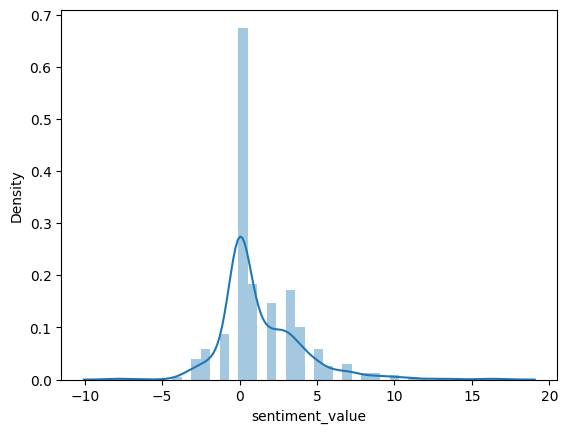

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

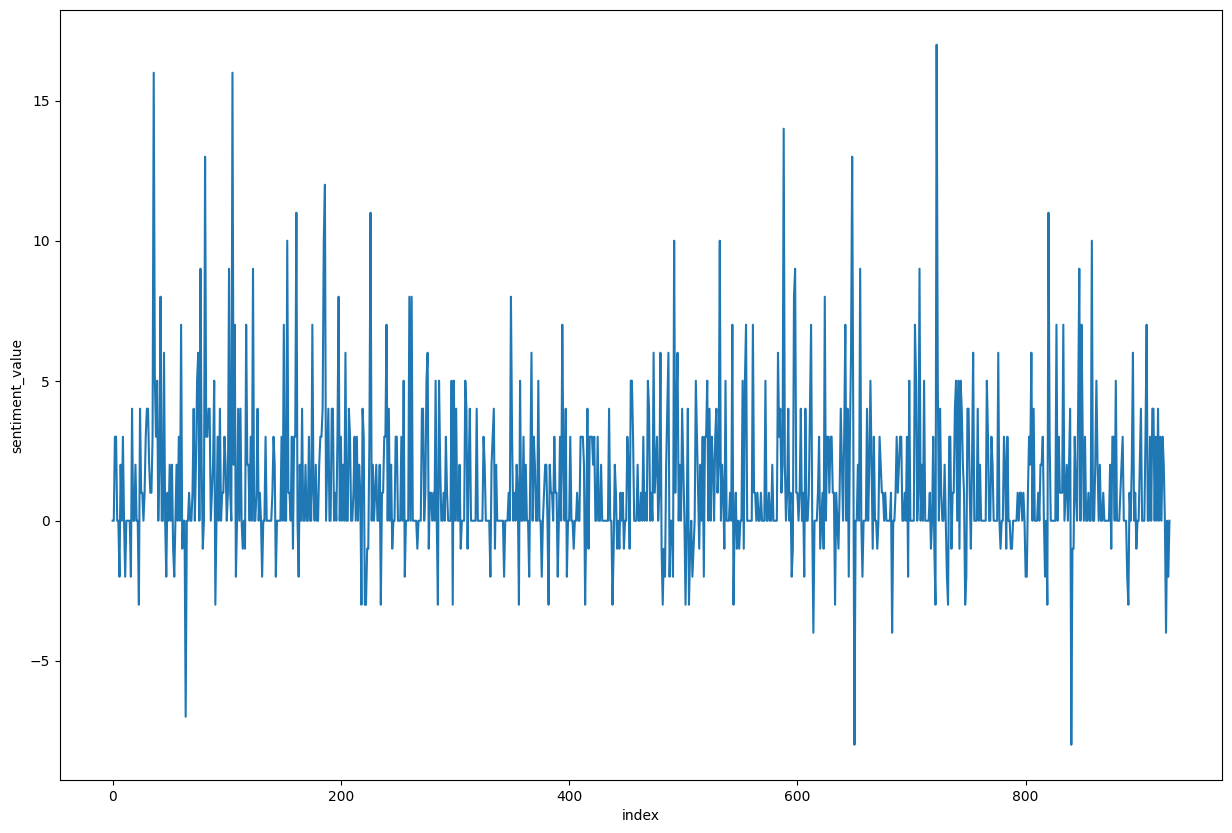

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

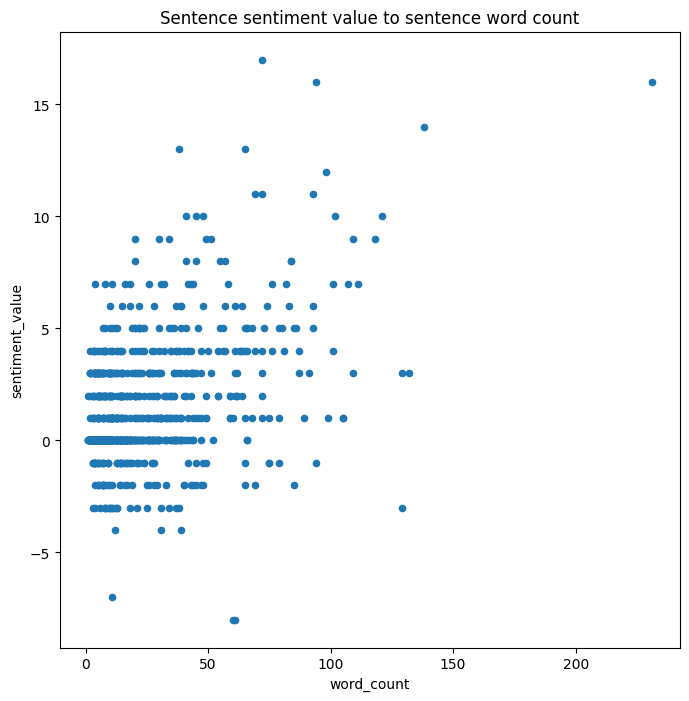

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')